In [1]:
print('小瓦加油！你会成功的！')

小瓦加油！你会成功的！


# 注意：
# 由于在本书写作完成后
# 雅虎停止了对中国大陆地区的服务
# 故此无法再直接使用datareader从雅虎获取A股行情数据
# 读者可以使用代理服务器
# 或者————
# 换成国内数据接口
# 例如下面的Tushare
# 但是要记得先：
# ！pip install tushare

In [2]:
#导入tushare并重命名为ts
import tushare as ts
#查看tushare的版本信息
ts.__version__

'1.2.84'

In [3]:
#指定一下获取股票数据的起始日期和截止日期
#这里就用2020年1月1日至3月18日的数据
start_date = '2020-01-01'
end_date = '2020-03-18'
#创建数据表，这里选择下载的股票代码为601318
#并把我们把设定的开始日期和截止日期作为参数传入
data = ts.get_k_data('601318',
                          start = start_date,
                          end = end_date)
data = data.set_index('date')
#下面来检查一下数据表的前5行
data.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,close,high,low,volume,code
date,,,,,,
2020-01-02,81.54,81.76,82.43,81.52,778252.0,601318
2020-01-03,82.45,81.84,82.52,81.54,594980.0,601318
2020-01-06,81.56,81.24,82.51,81.14,636448.0,601318
2020-01-07,81.65,81.79,82.10,81.31,452188.0,601318
2020-01-08,81.62,80.64,81.62,80.14,628053.0,601318


In [4]:
#给新的字段命名为diff，代表difference
#用.diff()方法来计算每日股价变化情况
data['diff'] = data['close'].diff()
#检查一下前5行
data.head()

,open,close,high,low,volume,code,diff
date,,,,,,,
2020-01-02,81.54,81.76,82.43,81.52,778252.0,601318,NaN
2020-01-03,82.45,81.84,82.52,81.54,594980.0,601318,0.08
2020-01-06,81.56,81.24,82.51,81.14,636448.0,601318,-0.60
2020-01-07,81.65,81.79,82.10,81.31,452188.0,601318,0.55
2020-01-08,81.62,80.64,81.62,80.14,628053.0,601318,-1.15


In [5]:
#此处会用到numpy，故导入
import numpy as np
#创建交易信号字段，命名为Signal
#如果diff值大于0，则Signal为1，否则为0
data['Signal'] = np.where(data['diff'] > 0, 1, 0)
#检查是否成功
data.head()

,open,close,high,low,volume,code,diff,Signal
date,,,,,,,,
2020-01-02,81.54,81.76,82.43,81.52,778252.0,601318,NaN,0
2020-01-03,82.45,81.84,82.52,81.54,594980.0,601318,0.08,1
2020-01-06,81.56,81.24,82.51,81.14,636448.0,601318,-0.60,0
2020-01-07,81.65,81.79,82.10,81.31,452188.0,601318,0.55,1
2020-01-08,81.62,80.64,81.62,80.14,628053.0,601318,-1.15,0


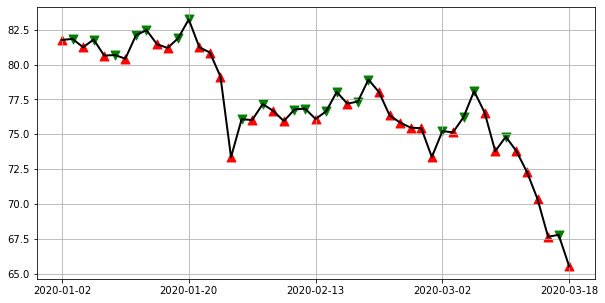

In [36]:
#导入画图工具matplotlib
import matplotlib.pyplot as plt
#设置画布的尺寸为10*5
plt.figure(figsize = (10,5))
#使用折线图绘制出每天的收盘价
plt.plot(data['close'],linewidth=2, color='k')
#如果当天股价上涨，标出卖出信号，用倒三角表示
plt.scatter(data['close'].loc[data.Signal==1].index,
        data['close'][data.Signal==1],
        marker = 'v', s=80, c='g')
#如果当天股价下跌给出买入信号，用正三角表示
plt.scatter(data['close'].loc[data.Signal==0].index,
        data['close'][data.Signal==0],
        marker = '^', s=80, c='r')
plt.xticks([0,12,24,36,48])
plt.grid()
#将图像进行展示
plt.show()